In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, spectrum_plot_1D, pSweep_1D, LandauEnergyTh
import numpy as np
import math
from numpy import pi, fabs
from copy import copy

In [2]:
#Some global and default parameters
SitesCount_XDefault = 600
fsys_1DDefault = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.2, pzNode1 = 0.63110, pzNode2 = -0.63110, \
                     EnergyNode1 = -0.0983, EnergyNode2 = 0.0983, VelocityXNode1 = 2.0, VelocityXNode2 = 2.0, \
                     VelocityZNode1 = 0.684, VelocityZNode2 = 0.684, \
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-3), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

# Weyl node (in absence of magnetic field)

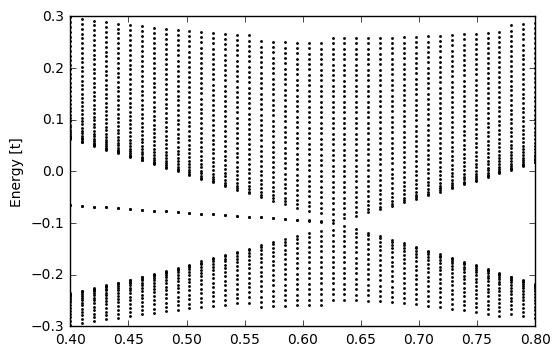

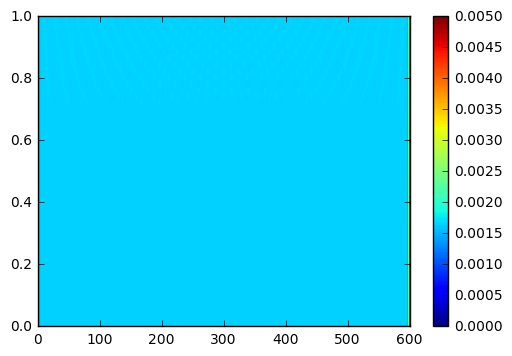

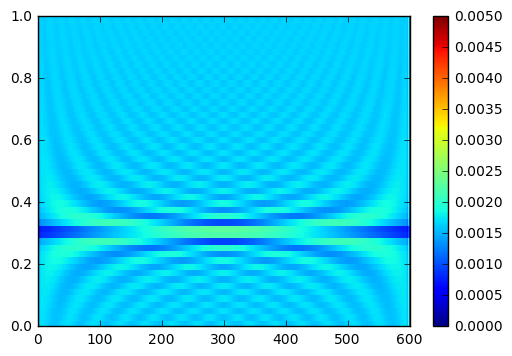

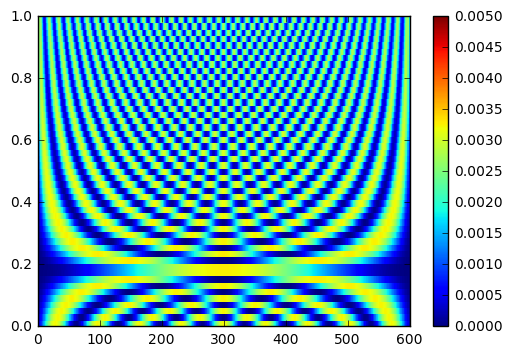

In [8]:
pzMin = 0.4
pzMax = 0.8
pzCount = 40

params = copy(ParametersDefault)
params.py = 0.

evals, evecs = pSweep_1D(fsys_1DDefault, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

params.pz = params.pzNode1
evals, evecs = diagonalize_1D(fsys_1DDefault, params)
#We see that the states with pz = pzNode and with energy close to the node
#(except of the Fermi arcs, which I identify as the surface states)
#somehow are almost independent of the x-coordinate! Why? What about the oscillation theorem?
#Perhaps, somehow instead of \psi \propto sin(px) we get purely imaginary wavefunction \psi \propto e^{ipx}, even in
#presence of boundaries. The similar thing is expected to appear in graphene
density_plot_1D(fsys_1DDefault,params,evecs)


params.pz = params.pzNode1 + 0.01
evals, evecs = diagonalize_1D(fsys_1DDefault, params)
#We see that the states with pz NOT exactly equal to pzNode but with energy close to the node
#(except of the Fermi arcs, which I identify as the surface states)
#have weak dependence on the x-coordinate, so that they have near-zero "wavenumber" in x-direction.
#Moreover, the density profile reminds sin^2(2pi x N_x/L_x), 
#which is more-less the density of the free particles in effective theory in system of finite size L_x, N_x is an integer
density_plot_1D(fsys_1DDefault,params,evecs)


params.pz = params.pzNode1 + 0.5
evals, evecs = diagonalize_1D(fsys_1DDefault, params)
density_plot_1D(fsys_1DDefault,params,evecs)

del pzMin, pzMax, pzCount, params, evals, evecs

In [9]:
params = copy(ParametersDefault)
params.py = 0.
params.pz = params.pzNode1
params.EigenvectorsCount = 10
params.EnergyPrecision = 10**(-5)
params.FermiEnergy = params.EnergyNode1

fsys_1D = diagonalizer.FinalizedSystem_1D(2000)
evals, evecs = diagonalize_1D(fsys_1D, params)

print(evals)
#AboveNodeEnergies = [energy for energy in evals if energy > params.EnergyNode1 - 0.01*fabs(params.EnergyNode1)]
print(params.EnergyNode1)


fsys_1D = diagonalizer.FinalizedSystem_1D(6000)
evals, evecs = diagonalize_1D(fsys_1D, params)

print(evals)
#AboveNodeEnergies = [energy for energy in evals if energy > params.EnergyNode1 - 0.01*fabs(params.EnergyNode1)]
print(params.EnergyNode1)


del params, fsys_1D, evecs, evals#, AboveNodeEnergies

[-0.11226667 -0.10913505 -0.10600346 -0.10287187 -0.09973997 -0.09660976
 -0.09347811 -0.0903468  -0.08721563 -0.08408456]
-0.0983
[-0.10299003 -0.10194425 -0.10089846 -0.09985263 -0.09880644 -0.09776188
 -0.09671582 -0.09567003 -0.09462429 -0.09357857]
-0.0983


# Now let us turn magnetic field and see how $p^z$ of the Weyl node gets changed

## No surface states around the Fermi energy seem to be present anymore, which simplifies the analysis

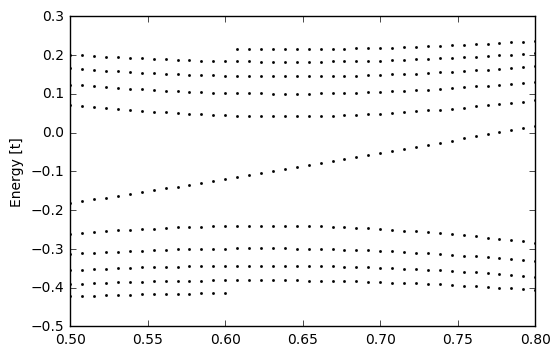

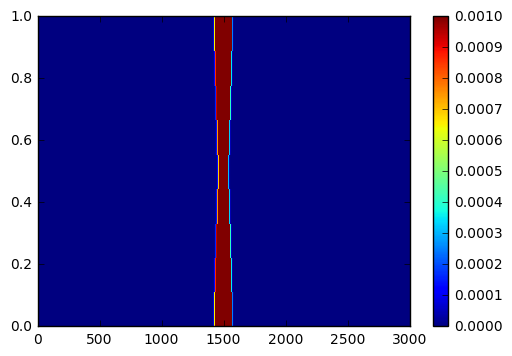

[-0.098605936295743865, 0.042643042778583884, 0.10097671873539454, 0.14564172139025314, 0.18321854395850878, 0.21625774490723193]
[-0.38087505284209666, -0.34317279521591126, -0.29837944311556908, -0.23991453109097838]
-0.298379443116 -0.2983
-0.239914531091 -0.239721356237
-0.0986059362957 -0.0983
0.0426430427786 0.0431213562373
0.100976718735 0.1017


In [13]:
pzMin = 0.5
pzMax = 0.8
pzCount = 40

params = copy(ParametersDefault)
params.py = 0.
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 10
params.EnergyPrecision = 10**(-5)
params.FermiEnergy = params.EnergyNode1

fsys_1D = diagonalizer.FinalizedSystem_1D(3000)
params.x_shift= (3000 - 1.)/2.

evals, evecs = pSweep_1D(fsys_1D, params, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
spectrum_plot_1D(evals,pzMin,pzMax,pzCount)


params.pz = params.pzNode1
evals, evecs = diagonalize_1D(fsys_1D, params)
density_plot_1D(fsys_1D,params,evecs)


# The energy lying in the gap seems to correspond to the n=0 Landau level
AboveNodeEnergies = [energy for energy in evals if energy > params.EnergyNode1 - 0.05*fabs(params.EnergyNode1)]
print(AboveNodeEnergies)
BelowNodeEnergies = [energy for energy in evals if energy <= params.EnergyNode1 - 0.05*fabs(params.EnergyNode1)]
print(BelowNodeEnergies)

print(BelowNodeEnergies[-2], LandauEnergyTh(-2, params, Deltapz = 0, NodeNumber = 1))
print(BelowNodeEnergies[-1], LandauEnergyTh(-1, params, Deltapz = 0, NodeNumber = 1))
print(AboveNodeEnergies[0], LandauEnergyTh(0, params, Deltapz = 0, NodeNumber = 1))
print(AboveNodeEnergies[1], LandauEnergyTh(1, params, Deltapz = 0, NodeNumber = 1))
print(AboveNodeEnergies[2], LandauEnergyTh(2, params, Deltapz = 0, NodeNumber = 1))


del pzMin, pzMax, pzCount, params, fsys_1D, evals, evecs, AboveNodeEnergies, BelowNodeEnergies

## By increasing the number of the sites (and keeping the magnetic field fixed), the Landau levels become doubly degenerate, which we do not want

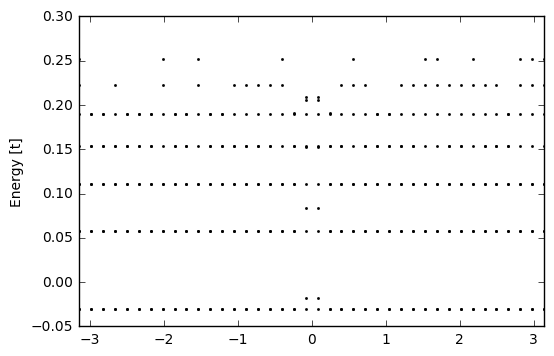

[-0.03067043 -0.03067043  0.05740473  0.05740473  0.11138695  0.11138695
  0.15404583  0.15404583  0.19041868  0.19041868]


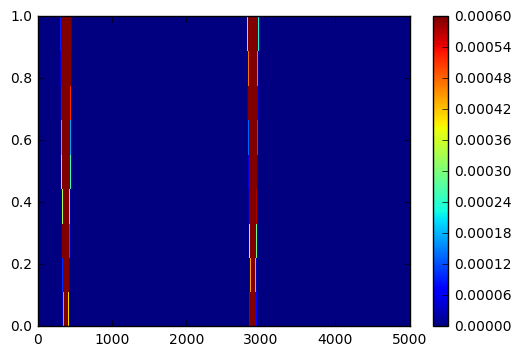

In [21]:
pyMin = -pi
pyMax = pi
pyCount = 40

params = copy(ParametersDefault)
params.pz = params.pzNode1 + 0.1
params.lBinv2 = 1./20.**2
params.EigenvectorsCount = 10
params.EnergyPrecision = 10**(-5)

fsys_1D = diagonalizer.FinalizedSystem_1D(5000)
params.x_shift= (5000 - 1.)/2.

evals, evecs = pSweep_1D(fsys_1D, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

params.py = 1.
evals, evecs = diagonalize_1D(fsys_1D, params)
print(evals)
density_plot_1D(fsys_1D,params,evecs)

## Let us take $p^z$ not too close to any of the node positions, and not too far from one of them

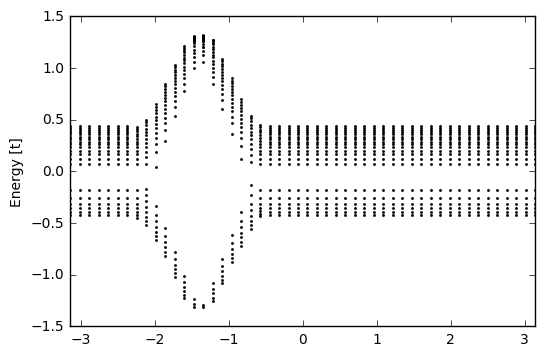

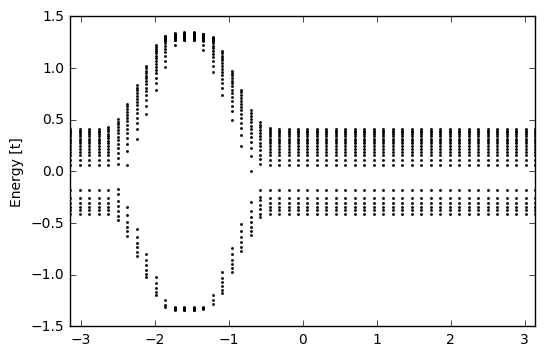

In [22]:
pyMin = -pi
pyMax = pi
pyCount = 50

fsys_1Dspecial1 = diagonalizer.FinalizedSystem_1D(2000)

params = copy(ParametersDefault)
params.pz = 0.5
params.EigenvectorsCount = 20 
params.lBinv2 = 1./20.**2

evals, evecs = diagonalizer.pSweep_1D( fsys_1Dspecial1, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

params.lBinv2 = 1./21.**2
evalsBvar, evecsBvar = diagonalizer.pSweep_1D( fsys_1Dspecial1, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evalsBvar,pyMin,pyMax,pyCount)

## Landau levels are non-degenerate, somehow the spectral flow acts as increasing of the energy (for a given $p^y$)

[-0.4225576  -0.39056956 -0.35462218 -0.31277814 -0.26066582 -0.18160181
  0.07237866  0.124203    0.16576126  0.20142511  0.2331319   0.26194311
  0.2885153   0.31328822  0.33657354  0.35860173  0.37954892  0.39955331
  0.41872577  0.43715701]
[-0.1816018052761367, 0.072378657654252707, 0.12420300390946779, 0.16576125808631617, 0.20142510891751381, 0.23313189816734203, 0.261943106354662, 0.28851529766908224, 0.3132882199748705, 0.33657354413084656, 0.35860173230285042, 0.37954891613611674, 0.3995533130558836, 0.41872577237331499, 0.43715700503590849]


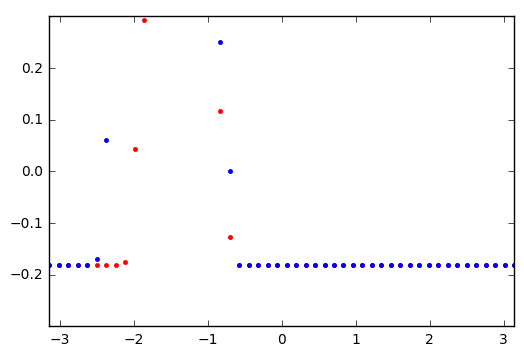

In [23]:
evalsAbove = [[energy for energy in evals[:][i] if energy > -0.2] for i in range(pyCount)] 
evalsAbove = np.transpose(evalsAbove)
print(evals[0])
print(evalsAbove[0])

evalsAboveBvar = [[energy for energy in evalsBvar[:][i] if energy > -0.2] for i in range(pyCount)] 
evalsAboveBvar = np.transpose(evalsAboveBvar)

import matplotlib.pyplot as plt
pyGrid = np.linspace(pyMin, pyMax, pyCount)
plt.plot(pyGrid, [evalsAbove[i][0] for i in range(pyCount)],'r.')
plt.plot(pyGrid, [evalsAboveBvar[i][0] for i in range(pyCount)],'b.')
plt.axis([pyMin, pyMax, -0.3, 0.3])
plt.show()

#del params, pyMin, pyMax, pyCount, evals, evecs, evecsPositive, evalsBvar, evecsBvar, evecsPositiveBvar

## Another value of $p^z$, for comparison: still, the levels are pushed up

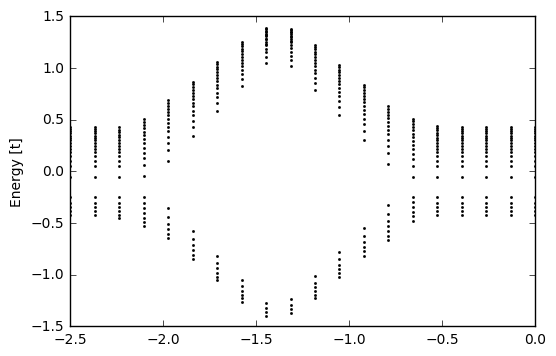

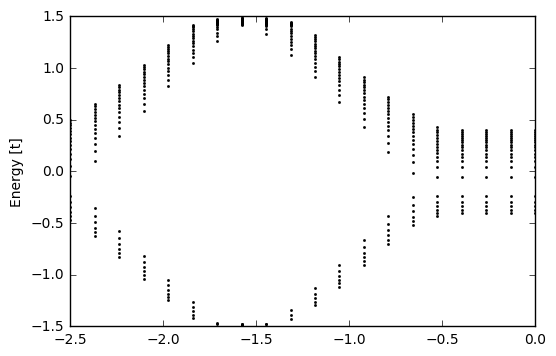

[-0.41837835 -0.3856743  -0.34862028 -0.30487575 -0.24866598 -0.05207947
  0.04937346  0.10551969  0.14920351  0.18619967  0.21884872  0.24837721
  0.27552335  0.30077249  0.32446397  0.34684617  0.36810735  0.38839429
  0.40782408  0.42649188]
[-0.052079470161010284, 0.049373457541724335, 0.10551969302162989, 0.14920351331619428, 0.18619966942705768, 0.21884872233626212, 0.24837720883108849, 0.27552335391251487, 0.3007724901752365, 0.32446397411442662, 0.34684616731543166, 0.36810734644758869, 0.38839429284719701, 0.40782408052097968, 0.42649188138145511]


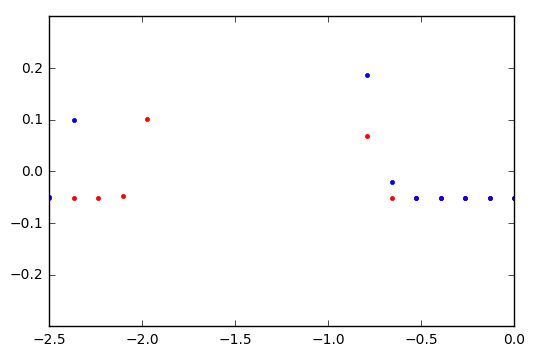

In [25]:
pyMin = -2.5
pyMax = 0.
pyCount = 20

fsys_1Dspecial1 = diagonalizer.FinalizedSystem_1D(2000)

params = copy(ParametersDefault)
params.pz = 0.7
params.EigenvectorsCount = 20 
params.lBinv2 = 1./20.**2

evals, evecs =pSweep_1D( fsys_1Dspecial1, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

params.lBinv2 = 1./21.**2
evalsBvar, evecsBvar = pSweep_1D( fsys_1Dspecial1, params, pyMin, pyMax, pCount=pyCount, yORzSweep = 'pySweep')
spectrum_plot_1D(evalsBvar,pyMin,pyMax,pyCount)

evalsAbove = [[energy for energy in evals[:][i] if energy > -0.2] for i in range(pyCount)] 
evalsAbove = np.transpose(evalsAbove)
print(evals[0])
print(evalsAbove[0])

evalsAboveBvar = [[energy for energy in evalsBvar[:][i] if energy > -0.2] for i in range(pyCount)] 
evalsAboveBvar = np.transpose(evalsAboveBvar)

import matplotlib.pyplot as plt
pyGrid = np.linspace(pyMin, pyMax, pyCount)
plt.plot(pyGrid, [evalsAbove[i][0] for i in range(pyCount)],'r.')
plt.plot(pyGrid, [evalsAboveBvar[i][0] for i in range(pyCount)],'b.')
plt.axis([pyMin, pyMax, -0.3, 0.3])
plt.show()

del params, pyMin, pyMax, pyCount, fsys_1Dspecial1, evals, evecs, evalsAbove, evalsBvar, evecsBvar, \
evalsAboveBvar, pyGrid